<a href="https://colab.research.google.com/github/ananyashreyjain/colab/blob/master/SOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Hyper paramaters

test_size = 0.2
random_state = 42
oov_token = '<oov>'
num_words = 1e7
embedding_dim = 100
trunc_type = 'post'
padding_type = 'post'
maxlen = 100


In [0]:
ignore = True
if not ignore:
  !wget --no-check-certificate http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Clothing_Shoes_and_Jewelry_5.json.gz -O AI/clothes.json.gz
  !wget --no-check-certificate http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Sports_and_Outdoors_5.json.gz -O AI/sports.json.gz
  !wget --no-check-certificate http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz -O AI/phones.json.gz
  !wget --no-check-certificate http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Toys_and_Games_5.json.gz -O AI/games.json.gz

In [0]:
ignore=True
if not ignore:
  !mkdir gdrive
  from google.colab import drive
  drive.mount('/gdrive')

In [0]:
ignore=True
if not ignore:
  !gunzip AI/clothes.json.gz
  !gunzip AI/sports.json.gz
  !gunzip AI/games.json.gz
  !gunzip AI/phones.json.gz

In [0]:
import pandas as pd
data_clothes = pd.read_json('AI/clothes.json', lines=True)
data_sports = pd.read_json('AI/sports.json', lines=True)
data_games = pd.read_json('AI/games.json', lines=True)
data_phones = pd.read_json('AI/phones.json', lines=True)

In [7]:
print(data_clothes.shape)
print(data_sports.shape)
print(data_games.shape)
print(data_phones.shape)

(278677, 9)
(296337, 9)
(167597, 9)
(194439, 9)


In [8]:
data_clothes.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [0]:
X_clothes, Y_clothes = data_clothes['reviewText'], data_clothes['overall']
X_sports, Y_sports = data_sports['reviewText'], data_sports['overall']
X_games, Y_games = data_games['reviewText'], data_games['overall']
X_phones, Y_phones = data_phones['reviewText'], data_phones['overall']

In [0]:
X_train = [None]*4
X_test = [None]*4
Y_train = [None]*4
Y_test = [None]*4
from sklearn.model_selection import train_test_split
X_train[0], X_test[0], Y_train[0], Y_test[0] = train_test_split(X_clothes, Y_clothes, random_state=42, test_size=test_size, shuffle=True)
X_train[1], X_test[1], Y_train[1], Y_test[1] = train_test_split(X_sports, Y_sports, random_state=42, test_size=test_size, shuffle=True)
X_train[2], X_test[2], Y_train[2], Y_test[2] = train_test_split(X_games, Y_games, random_state=42, test_size=test_size, shuffle=True)
X_train[3], X_test[3], Y_train[3], Y_test[3] = train_test_split(X_phones, Y_phones, random_state=42, test_size=test_size, shuffle=True)

In [11]:
print(X_train[0].shape, Y_train[0].shape)
print(X_test[0].shape, Y_test[0].shape)

(222941,) (222941,)
(55736,) (55736,)


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = [None]*4
sequences_train =[None]*4
sequences_test = [None]*4
padded_train = [None]*4
padded_test = [None]*4
for _ in range(0,4):
  tokenizer[_] = Tokenizer(num_words=num_words)
  tokenizer[_].fit_on_texts(X_train[_])
  sequences_train[_] = tokenizer[_].texts_to_sequences(X_train[_])
  sequences_test[_] = tokenizer[_].texts_to_sequences(X_test[_])
  padded_train[_] = pad_sequences(sequences_train[_], maxlen=maxlen, padding=padding_type, truncating=trunc_type)
  padded_test[_] = pad_sequences(sequences_test[_], maxlen=maxlen, padding=padding_type, truncating=trunc_type)


In [13]:
vocab_size = [len(tokenizer[0].index_word),len(tokenizer[1].index_word),len(tokenizer[2].index_word),len(tokenizer[3].index_word)]
print(vocab_size)

[75949, 119637, 80762, 81436]


In [14]:
print(X_train[0].iloc[1])
string = [tokenizer[0].index_word.get(x," ") for x in padded_train[0][1]]
print(string)
print(len(string))

I LOVE THE COLORS OF THESE SOCKS BUT ONE COLOR COBINATION ;ONE OF THE PRETTIEST--TURQUIISE AND YELLOW IS WAY TOO TIGHT TO PULL THEM ON WITHOUT A CROWBAR! THE OTHERS FIT FINE. ILL BUY MORE IF YOU CAN MAKE THEM BIGGER. THE COLORS ARE WONDERFUL!
['i', 'love', 'the', 'colors', 'of', 'these', 'socks', 'but', 'one', 'color', 'cobination', 'one', 'of', 'the', 'prettiest', 'turquiise', 'and', 'yellow', 'is', 'way', 'too', 'tight', 'to', 'pull', 'them', 'on', 'without', 'a', 'crowbar', 'the', 'others', 'fit', 'fine', 'ill', 'buy', 'more', 'if', 'you', 'can', 'make', 'them', 'bigger', 'the', 'colors', 'are', 'wonderful', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
100


In [23]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size[0]+1,output_dim=embedding_dim, input_length=maxlen),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          7595000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 64)            32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 9222      
Total params: 7,636,286
Trainable params: 7,636,286
Non-trainable params: 0
____________________________________________

In [24]:
num_epochs = 1
history = model.fit(padded_train[0], Y_train[0], epochs=num_epochs, validation_data=(padded_test[0], Y_test[0]))

Train on 222941 samples, validate on 55736 samples
222941/222941 [==============================] - 670s 3ms/sample - loss: 0.8300 - accuracy: 0.6638 - val_loss: 0.7785 - val_accuracy: 0.6815


In [0]:
model.save('model.h5')

<Figure size 432x288 with 0 Axes>

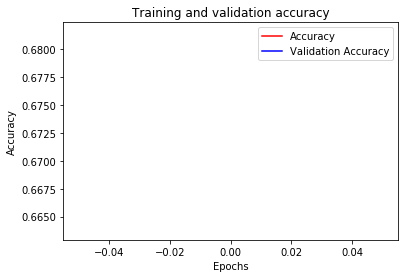

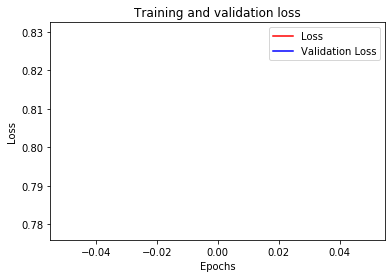

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

In [128]:
import numpy as np
inp = [None]*6
inp[0] = "Cloth fabric looks cheap"
inp[1] = "This shirt is cheap in price"
inp[2] = "The colour of shirt faded within a week"
inp[3] = "The quality of the shirt is okay"
inp[4] = "The shirt I got is very dirty"
inp[5] = "I give this shirt a four star rating"
val=tokenizer[0].texts_to_sequences(inp)
seq = pad_sequences(val, maxlen=maxlen, padding=padding_type, truncating=trunc_type)
pre=model.predict(seq)
for no, _ in enumerate(pre):
  print("rating received for '%s' = %d" % (inp[no],(np.where(max(_)==_)[0][0])))

rating received for 'Cloth fabric looks cheap' = 1
rating received for 'This shirt is cheap in price' = 5
rating received for 'The colour of shirt faded within a week' = 1
rating received for 'The quality of the shirt is okay' = 3
rating received for 'The shirt I got is very dirty' = 1
rating received for 'I give this shirt a four star rating' = 4
